In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import array_to_latex

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

print("Libraries imported successfully")

Libraries imported successfully


# Week 2 day 5 - Measurements



## Coding cheat sheet:

Defining a quantum circuit: 

`qc = QuantumCircuit(1)` Define a 1 qubit quantum circuit <br>

`qc.x(0)` Add an X gate <br>
`qc.h(0)` Add an H gate <br>
`qc.z(0)` Add a Z gate <br>
`qc.y(0)` Add a Y gate <br>

`qc.draw()` Draw the circuit <br>

**Using the statevector simulator** (Do this no matter which way you want to see the output):<br>

`svsim = Aer.get_backend('statevector_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,svsim)` # Put in the name of your quantum circuit where it says qc<br>
`result = job.result()` <br>


See the output on the Bloch sphere:<br>
`state = result.get_statevector()` <br>
`plot_bloch_multivector(state)`<br>

See the output in vector form:<br>
`state = result.get_statevector()` <br>
`array_to_latex(state, pretext="\\text{Statevector} = ")` <br>

See the output in histogram form: <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` <br>

**Using the qasm simulator:**

`svsim = Aer.get_backend('qasm_simulator')` # Change statevector to qasm <br>
`job = execute(qc,svsim,shots=100)` # add shots - tell it how many times to run <br>
`result = job.result()` <br>


**Using a real quantum computer:**



`job = execute(qc, backend=backend, shots=100)`

`result = job.result()` <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` 





## Measurements on 1 qubit circuits

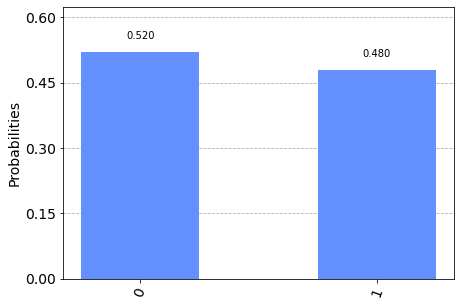

In [15]:
# BLOCK 1 - Make a 1-qubit quantum circuit that uses an H gate
# find the output in the form of a histogram

qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all() # adding measurements to the circuit

svsim = Aer.get_backend('qasm_simulator') # Change statevector to qasm
job = execute(qc,svsim,shots=100) # add shots - tell it how many times to run
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)
print()

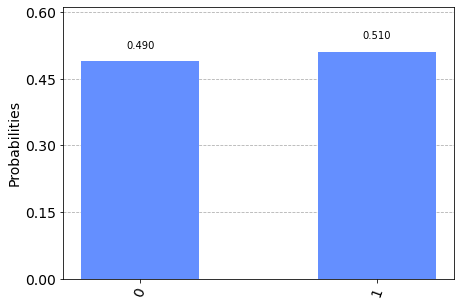

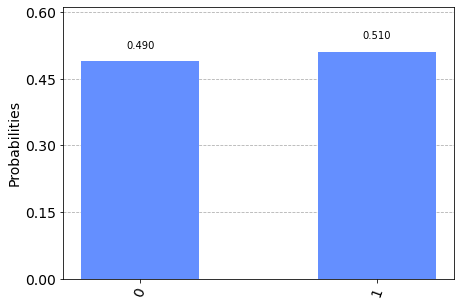

In [6]:
# BLOCK 2 - Find the output of the quantum circuit in Block 1 as a histogram
# but this time use the qasm simulator. The code is provided here.

qc.measure_all() # adding measurements to the circuit

svsim = Aer.get_backend('qasm_simulator') #tell it what simulator you want to use
job = execute(qc,svsim,shots=100) #add shots - tell it how many times to run.
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

## Measurements on 2 qubit circuits


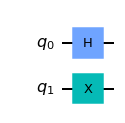

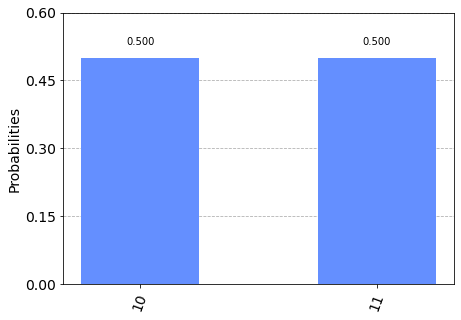

In [10]:
# BLOCK 3 - Make a 2-qubit quantum circuit with an H gate on the first qubit and an X gate on the second
#find the output as a histogram using the statevector simulator

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)

print()

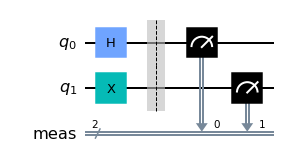

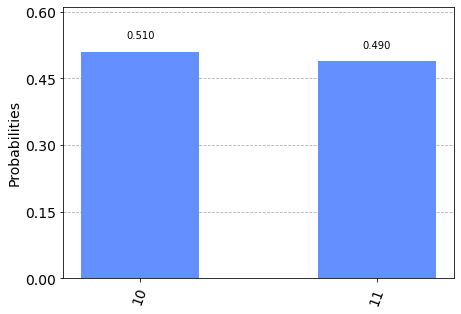

In [13]:
# BLOCK 4 - Find the histogram of the quantum circuit from Block 4 using the qasm simulator
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.measure_all()
qc.draw()

svsim = Aer.get_backend('qasm_simulator') #tell it what simulator you want to use
job = execute(qc,svsim,shots=100) #add shots - tell it how many times to run.
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)
print()

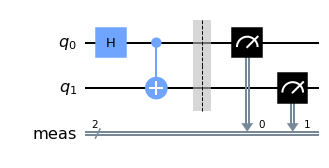

In [19]:
# BLOCK 5 - Create a 2 qubit quantum circuit with an H gate on q0 and a CX gate with q0 as control bit and q1 as target bit.
# don't forget to add measurements
# Draw the circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc.measure_all()
qc.draw()
print()

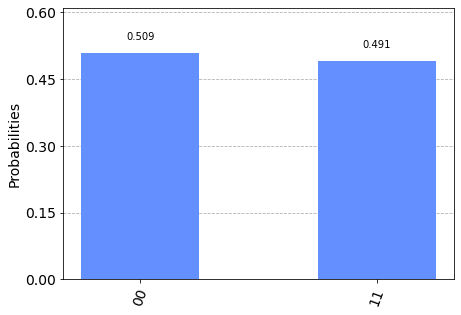

In [21]:
# Block 6- Run this block to simulate the circuit in Block 1 using qasm simulator to obtain the output histogram
# is the result what you expected?
svsim = Aer.get_backend('qasm_simulator') #tell it what simulator you want to use
job = execute(qc,svsim,shots=1000) #add shots - tell it how many times to run.
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)
print()


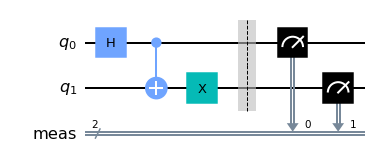

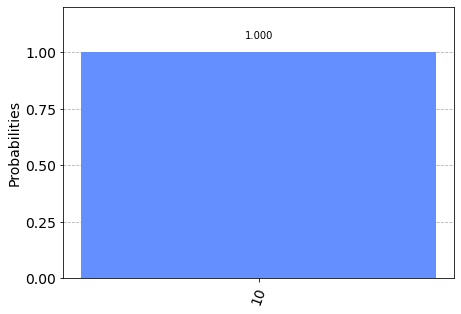

In [35]:
# Block 7 - Try to make a quantum circuit that entangles the two qubits 
# such that they are always in opposite states
# you can use the statevector simulator and find the vector output to check your work
qc = QuantumCircuit(2)
qc.h(0)

qc.cx(0,1)
qc.x(1)
qc.measure_all()
qc.draw()
print()

svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)
print()


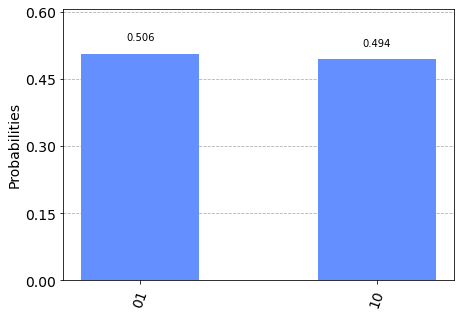

In [31]:
# BLOCK 8 - Simulate the B_01 state (from Block 7) on the qasm simulator.
# how does the histogram look different from the one in Block 7?
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.x(1)

qc.measure_all()

svsim = Aer.get_backend('qasm_simulator') #tell it what simulator you want to use
job = execute(qc,svsim,shots=1000) #add shots - tell it how many times to run.
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)
print()



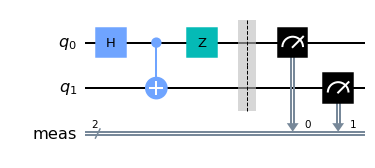

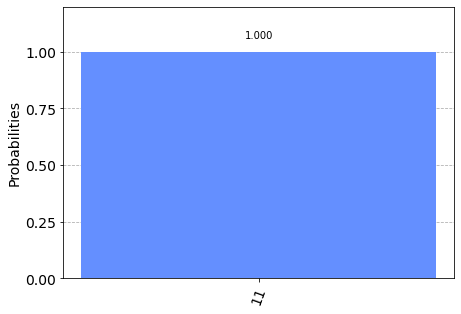

In [48]:
# Block 9- Try to make a quantum circuit that will result in the B_10 state. 
# check your work using the statevector simulator to find either the histogram or the vector output
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)
qc.z(0)
qc.measure_all()
qc.draw()
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)

print()



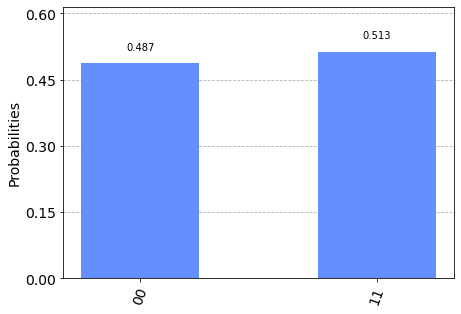

In [46]:
# Block 10 - Simulate the B_10 circuit on the qasm simulator. 

svsim = Aer.get_backend('qasm_simulator') #tell it what simulator you want to use
job = execute(qc,svsim,shots=1000) #add shots - tell it how many times to run.
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)
print()

<IPython.core.display.Math object>

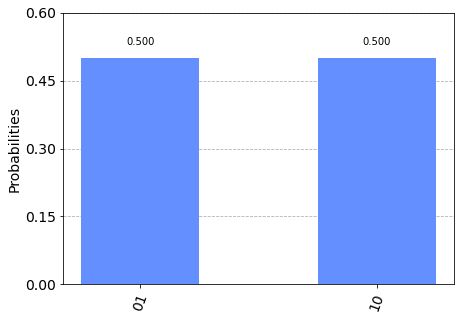

In [50]:
# Block 11 - Try to make a quantum circuit that will result in the B_11 state. 
# check your work using the statevector simulator to find either the histogram or the vector output
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.z(0)
qc.x(0)

svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)

state = result.get_statevector()
array_to_latex(state, pretext="\\text{Statevector} = ")


In [ ]:
# Block 12 - Simulate the circuit in Block 11 using qasm simulator to obtain the output histogram



## Optional Content

In [ ]:
# Block 13 - Copy the code provided by the TA



In [ ]:
# Block 14 - What do you expect the output of this code to be?

